# Day 2

## Part 3: Measures of distance

We are moving from exploring the data and engineering the features to unsupervised learning. One of the central ideas of unsupervised learning is 'clustering'. Intuitively, we are familiar with the idea of clusters in our data that may be representative of an interesting phenomenon. However, before we can search for clusters, we need to have a notion of 'distance'.

#### Euclidean distance or the 'L2' norm

Just like you were taught in geometry class, the distance between any two vectors (points in space) a and b with coordinates x, y, and z is:

$$ sqrt( (x_a - x_b)^2 + (y_a - y_b)^2 + (z_a - z_b)^2 ) $$

or

$$ ( (x_a - x_b)^2 + (y_a - y_b)^2 + (z_a - z_b)^2 )^{1/2} $$

Find the l2 distance between:
`a = [1,2,4,8,16]` and
`b = [1,1,2,3,5]`

#### 'Manhattan distance' or the 'L1' norm

Another common measure of distance, instead of using the distance 'as the crow flies' takes the distance between every component of the two vectors and simply adds it together:

$$ (x_a - x_b) + (y_a - y_b) + (z_a - z_b) $$

This is often referred to as 'Manhattan distance' because in two dimensions, this is the equivalent to the number of blocks you would walk on the grid-like layout of manhattan to get from one point to another (whereas Euclidean distance would be the distance it took you in a helicopter!).

While we are more familiar with the l2 norm, there are many applications of the l1 norm in physical systems (for instance, the way forces move along a lattice in physics/chemistry) as well as machine learning applications include the Lasso regression (which we will discuss in greater detail later).

As you may have noticed, the l1 norm could also be written:

$$ ( (x_a - x_b)^1 + (y_a - y_b)^1 + (z_a - z_b)^1 )^{1} $$

Find the l1 distance between:
`a = [1,2,4,8,16]` and
`b = [1,1,2,3,5]`



#### L{n} norms and the inf-norm

Based on the pattern you may have noticed from the l2 and l1 norm, we can actually construct a measure of distance for any number n:

$$ ( (x_a - x_b)^n + (y_a - y_b)^n + (z_a - z_b)^n )^{1/n} $$

Besides the l2 and l1 norm, the 'inf norm' (inf is short for infinity) is often used.

What does the equation above turn into if the n is replaced with infinity...?

$$ max((x_a - x_b), (y_a - y_b), (z_a - z_b)) $$


Find the l1 distance between:
`a = [1,2,4,8,16]` and
`b = [1,1,2,3,5]`


## Clustering

We will re-visit the customer data set from day 1 in order to try out a few clustering algorithms, in particular KMeans and Hierarchichal clustering.

In [1]:
# import python packages
from __future__ import print_function, division

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.metrics.cluster import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage


customers = pd.read_csv('data/customers_after_FEng.csv', 
                                index_col='CustomerID')

## Clustering with K-Means

K-means clustering is a method for finding clusters and cluster centers in a set of points. The K-means algorithm alternates the two steps:

1. for each center, identify the subset of training points that are closer to it than to any other center
2. update the location of the center to match the points related to it

These two steps are iterated until the centers no longer move (significantly) or the assignments no longer change. Then, a new point $x$ can be assigned to the cluster of the closest prototype.

### Learning Activity - Run K-Means with two features

Isolate the features `mean_spent` and `max_spent`, then run the K-Means algorithm on the resulting dataset using K=2 and visualise the result. You will need:

* to create an instance of `KMeans` with 2 clusters
* fit this to the isolated features (via the `.fit` method)
* look how it's doing by using by showing the assignment predicted (via the `.predict` method)

This is the standard SKLearn workflow for most of the algorithms.

In [2]:
# Apply k-means with 2 clusters using a subset of features 
# (mean_spent and max_spent)
kmeans = KMeans(n_clusters = 2)
cust2  = customers[['mean_spent', 'max_spent']]
kmeans.fit(cust2)
cluster_assignment = kmeans.predict(cust2)


Here is a simple function to visualize what is happening:

In [3]:
# This function generates a pairplot enhanced with the result of k-means
def pairplot_cluster(df, cols, cluster_assignment):
    """
    Input
        df, dataframe that contains the data to plot
        cols, columns to consider for the plot
        cluster_assignments, cluster asignment returned 
        by the clustering algorithm
    """
    # seaborn will color the samples according to the column cluster
    df['cluster'] = cluster_assignment 
    sns.pairplot(df, vars=cols, hue='cluster')
    df.drop('cluster', axis=1, inplace=True)

See if you can understand how the function works and use it to plot the clusters we just made:

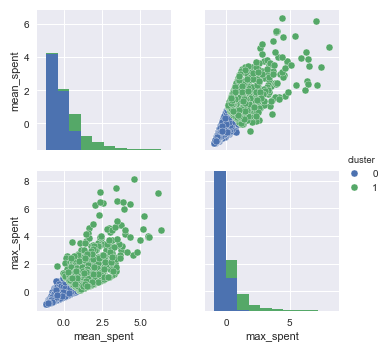

In [4]:
# Visualise the clusters using pairplot_cluster()
pairplot_cluster(customers, 
                 ['mean_spent', 'max_spent'], 
                 cluster_assignment)


#### What can you observe?

* the separation between the two clusters is "clean" (the two clusters can be separated with a line)
* one cluster contains customers with low spendings, the other one with high spendings

### Test Activity - Run K-Means with all the features
Run K-Means using all the features available and visualise the result in the subspace `mean_spent` and `max_spent`.

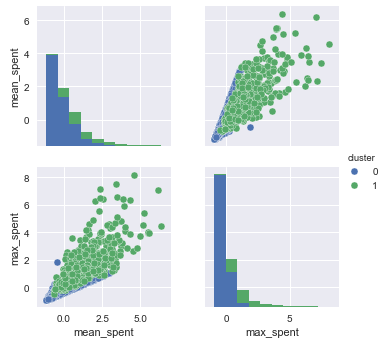

In [5]:
# Apply k-means with 2 clusters using all features
kmeans = KMeans(n_clusters = 2)
kmeans.fit(customers)
cluster_assignment = kmeans.predict(customers)

# Visualise the clusters using pairplot_cluster()
pairplot_cluster(customers, 
                 ['mean_spent', 'max_spent'], 
                 cluster_assignment)



The result is now different. The first cluster contains customers with a maximum spending close to the minimum mean spending and the second contains customers with a maximum spending far from the minimum mean spending. This way can tell apart customers that could be willing to buy object that cost more than their average spending.

***Question***: Why can't the clusters be separated with a line as before?

### Learning activity - Compare expenditure between clusters

Select the features `'mean_spent'` and `'max_spent'` and compare the two clusters obtained above using them.

In [9]:
# Compare expenditure between clusters
features = ['mean_spent', 'max_spent']
# create a dataframe corresponding to the case
# cluster_assignment == 0
cluster1_df = pd.DataFrame(data= customers[cluster_assignment == 0], 
                             columns=customers.columns)[features]

cluster1_desc = cluster1_df.describe()
cluster1_desc.columns = [c+'_0' for c in cluster1_desc.columns]

# then with ==1
cluster2_df = pd.DataFrame(data=customers[cluster_assignment == 1], 
                             columns=customers.columns)[features]

cluster2_desc = cluster2_df.describe()
cluster2_desc.columns = [c+'_1' for c in cluster2_desc.columns]

#Concatenate both:
compare_df = pd.concat((cluster1_desc, cluster2_desc), axis=1)
compare_df


,mean_spent_0,max_spent_0,mean_spent_1,max_spent_1
count,2557.000000,2557.000000,569.000000,569.000000
mean,-0.263067,-0.331974,1.182182,1.491843
std,0.722709,0.474954,1.200657,1.327692
min,-1.164888,-0.920492,-0.682826,-0.449576
25%,-0.812688,-0.698826,0.319713,0.605990
50%,-0.463081,-0.485917,0.829001,1.182047
75%,0.072528,-0.050628,1.822721,2.009565
max,2.944977,2.066335,6.362242,8.150460


### Test Activity - Looking at the centroids

Look at the centroids of the clusters `kmeans.cluster_centers_` and check the values of the centers in for the features `mean_spent`, `max_spent`. You will need to create a new DataFrame where the data is simply `kmeans.cluster_centers_`.

In [10]:
# Get the centroids and display them
centers_df = pd.DataFrame(data=kmeans.cluster_centers_, 
                          columns=customers.columns)
print(centers_df[features])

   mean_spent  max_spent
0   -0.263067  -0.331974
1    1.182182   1.491843


### Learning Activity - Compare mean expediture with box plot

Compare the distribution of the feature `mean_spent` in the two clusters using a box plot. You will need:

* `sns.boxplot` (seaborn's boxplot)

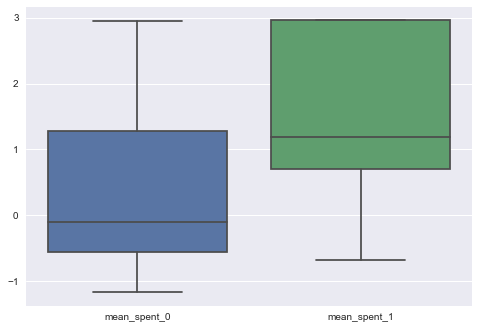

In [11]:
# Compare mean expediture with box plot
cluster1_df.columns = [c+'_0' for c in cluster1_df.columns]
cluster2_df.columns = [c+'_1' for c in cluster2_df.columns]

#plt.figure(figsize = (10,6))
sns.boxplot(data=pd.concat((cluster1_desc['mean_spent_0'], 
                            cluster2_desc['mean_spent_1']), 
                           axis=1), showfliers=False)

### Learning Activity - Compute the silhouette score
Compute the silhouette score of the clusters resuting from the application of K-Means.

The Silhouette Coefficient is calculated using the mean intra-cluster distance (``a``) and the mean nearest-cluster distance (``b``) for each sample.  The Silhouette Coefficient for a sample is ``(b - a) / max(a, b)``. It represents how similar a sample is to the samples in its own cluster compared to samples in other clusters.

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

SKLearn provides the function `silhouette_score` which you can call and display.

In [12]:
# Computing the silhouette score
print('silhouette_score', 
      silhouette_score(customers, cluster_assignment))


silhouette_score 0.50400998727


This silhouette score is reasonably high which we can intepret as meaning that the clusters we identified are quite compact.

### Test Activity - Run KMeans on the dataset obtained with PCA

Compute KMeans on the dataset `customersPCA` (we saved it before and need to load it) using the first 2 principal components.

Visualise the results using again the function `pairplot_cluster` in the first 4 principal components.

In [13]:
customersPCA = pd.read_csv('data/customers_after_FEng_PCA_scores.csv')

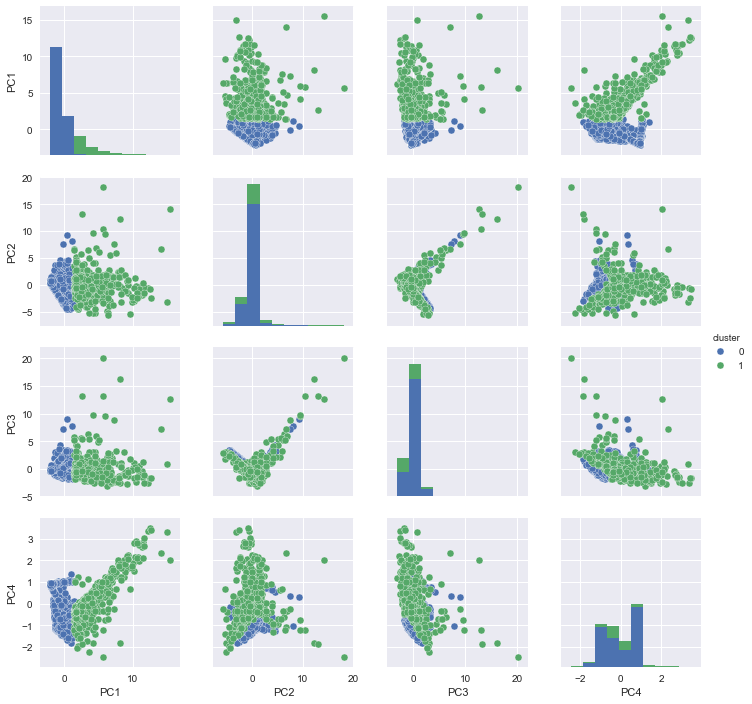

In [15]:
# Run KMeans on the first two principal components
kmeans = KMeans(n_clusters = 2)
kmeans.fit(customersPCA[['PC1', 'PC2']])
cluster_assignment = kmeans.predict(customersPCA[['PC1', 'PC2']])
pairplot_cluster(customersPCA, ['PC1', 'PC2', 'PC3', 'PC4'], 
                 cluster_assignment)


### Bonus activity

Run the clustering on the Iris data set (http://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) 

This is much simpler/cleaner data set and try using k=2 or k=3.

These clusters are somewhat 'oblong' can you explain why KMeans may not work as well for this 'shape' of cluster?

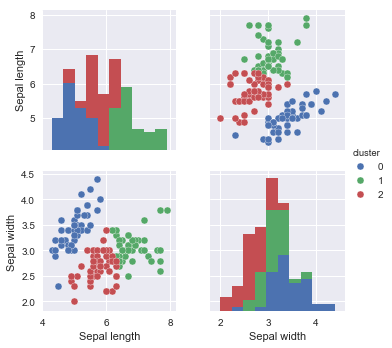

In [39]:
from sklearn import datasets

# import some data to play with
X = pd.DataFrame(iris.data[:, :2], columns = ['Sepal length', 'Sepal width'])  # we only take the first two features.
Y = iris.target

kmeans = KMeans(n_clusters = 3)
kmeans.fit(X)
cluster_assignment = kmeans.predict(X)

pairplot_cluster(X, ['Sepal length', 'Sepal width'], 
                 cluster_assignment)

## Hierarchical clustering: Linking with Linkage

The main idea behind hierarchical clustering is that you start with each point in it's own cluster and then

1. compute distances between all clusters
2. merge the closet clusters

Do this repeatedly until you have only one cluster.

This algorithm groups the samples in a bottom-up fashion and falls under the category of the agglomerative clustering algorithms.

According to the distance between clusters and samples that one choose the clusters will have different properties. In this section we'll use a distance that will minimizes the variance of the clusters being merged.

This algorithm results in a hierarchy, or binary tree, of clusters branching down to the last layer which has a leaf for each point in the dataset that can be visualise with a "Dendrogram". 

The advantage of this approach is that clusters can grow according to the shape of the data rather than being globular (we had this issue with the bonus activity on the iris data above).

sklearn implements hierarchical clustering in the class `sklearn.cluster.AgglomerativeClustering` (http://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering), this class is mainly a wrapper to the functions in `scipy.cluster.hierarchy` (http://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html).

### Learning Activity - Plotting dendograms
Use the function `linkage()` from `scipy.cluster.hierarchy` to cluster the retail data and pass the result to the function `dendrogram()` to visualise the result. Truncate the dendrogram if the initial result is unreadable.

Feel free to change the metric to different distances to experiment!

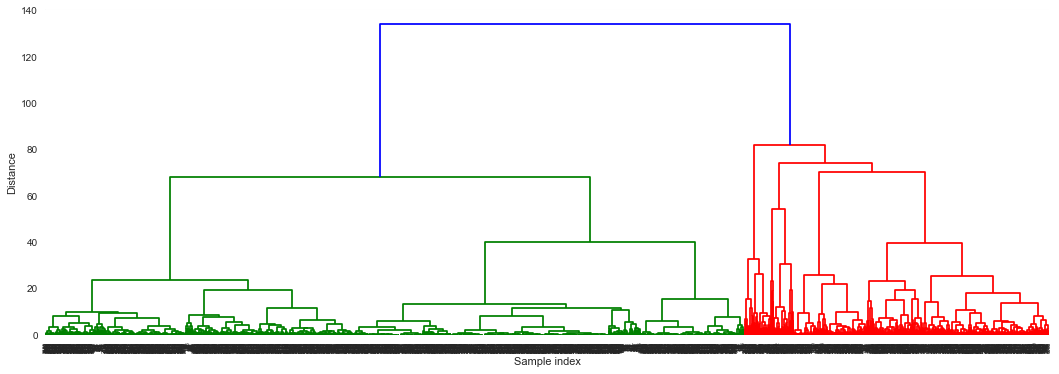

In [40]:
# Apply hierarchical clustering 
Z = linkage(customers, method='ward', metric='euclidean')

# Draw the dendrogram
plt.figure(figsize=(18,6))
dendrogram(Z)
plt.ylabel('Distance')
plt.xlabel('Sample index')


The coloring of the figure highlights that the data can be segmented in two big clusters that were merged only in the very last iterations of the algorithm.

Another advantage of this method, compared to KMeans is that we can often look at the tree to see if there are clear sub-families or clusters within larger clusters. Part of being a good data scientist is using 'domain expertise' and often this expertise can allow us to better understand whether these clusters are of real interest.

We can improve the readability of the dendrogram showing only the last merged clusters and a threshold to color the clusters. For this use

* the option `truncate_mode` in `dendrogram`.

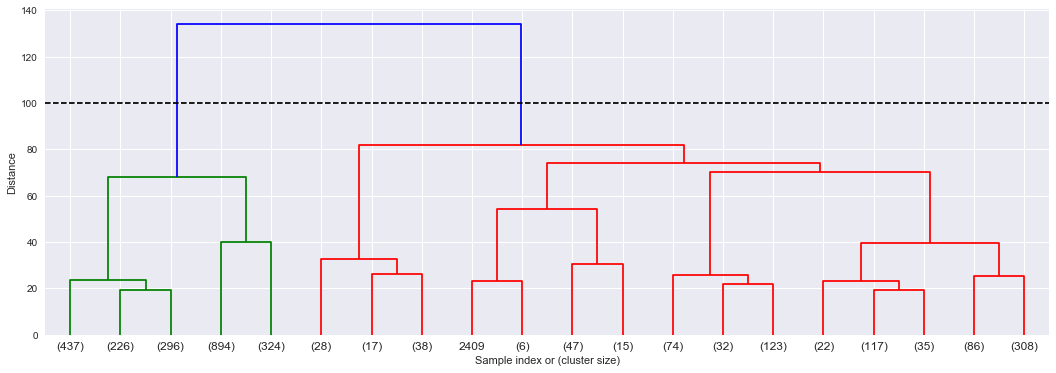

In [42]:
# Draw the dendrogram using a cut_off value
plt.figure(figsize=(18,6))
cut_off = 100

dendrogram(Z, color_threshold=cut_off,
           truncate_mode='lastp', 
           p=20)

plt.ylabel('Distance')
plt.xlabel('Sample index or (cluster size)')
plt.hlines(cut_off, 0, len(customers), linestyle='--')


Note that while we are cutting through the tree at a fixed height, there are methods that cut branches non-uniformly in an attempt to maximize intra-cluster variation.

For example: https://www.youtube.com/watch?v=6h2UMpPn2Kk

## Summary

There are a number of powerful tools at your disposal for doing unsupervised learning using Pandas and Scikit learn. We have just scratched the surface, but you now have the tools at your disposal to learn a wide variety of new methods, many of which will have applications in different fields.

In industry, the 'workhorses' of unsupervised learning are:
- Principal components analysis
- Kmeans clustering
- Hierarchical clustering

DBScan is another method that we have not covered, but which is implemented in sklearn that outperforms KMeans in many settings, particularly when clusters are not globular.

You may come across `t-Distributed Stochastic Neighbor Embedding` or `t-SNE` which is increasingly used where principal components analysis may have been used previously. This is a powerful and mathematically well-founded technique, but use and interpret it with caution! There are a number of parameters to tune (unlike PCA) which makes it easier to produce spurious clustering.

## END OF DAY 2